<a href="https://colab.research.google.com/github/jesus-tomas-girones/Mask_Detect/blob/main/6cat_val_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
FOLDER = '6cat_val'
!wget "http://mmoviles.upv.es/mascarillas/{FOLDER}.zip"
!unzip -qq -n {FOLDER}.zip


--2021-06-18 22:49:28--  http://mmoviles.upv.es/mascarillas/6cat_val.zip
Resolving mmoviles.upv.es (mmoviles.upv.es)... 158.42.250.56
Connecting to mmoviles.upv.es (mmoviles.upv.es)|158.42.250.56|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31735949 (30M) [application/zip]
Saving to: ‘6cat_val.zip’

6cat_val.zip        100%[===================>]  30.27M  3.69MB/s    in 8.7s    

2021-06-18 22:49:37 (3.48 MB/s) - ‘6cat_val.zip’ saved [31735949/31735949]



In [ ]:
from keras_preprocessing.image import ImageDataGenerator

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=5,
      horizontal_flip=True)
train_generator = training_datagen.flow_from_directory(
	   FOLDER+'/training',
     batch_size=BATCH_SIZE,
     seed=9,
	   target_size=IMG_SIZE)

validation_datagen = ImageDataGenerator(
      rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(
	  FOLDER+'/validation/',
    batch_size=BATCH_SIZE,
	  target_size=IMG_SIZE,
    shuffle=False,
    seed=9) 

Found 1000 images belonging to 6 classes.
Found 194 images belonging to 6 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=IMG_SIZE+(3,)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 107, 107, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 49, 128)       204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       1

## Train the top layer

In [ ]:
EPOCHS = 40
INIT_LR = 1e-4
model.compile(
    optimizer=keras.optimizers.Adam(
        learning_rate=INIT_LR, 
        decay=INIT_LR / EPOCHS),
    loss=keras.losses.categorical_crossentropy,
    metrics=["accuracy"],
)
H = model.fit(
    train_generator, 
    epochs=EPOCHS, 
    batch_size = BATCH_SIZE,
    validation_data=validation_generator,
    validation_batch_size = BATCH_SIZE,
)

Epoch 1/40
32/32 [==============================] - 27s 324ms/step - loss: 1.5015 - accuracy: 0.4430 - val_loss: 1.3061 - val_accuracy: 0.4588
Epoch 2/40
32/32 [==============================] - 10s 323ms/step - loss: 1.1687 - accuracy: 0.5990 - val_loss: 1.0138 - val_accuracy: 0.6856
Epoch 3/40
32/32 [==============================] - 11s 337ms/step - loss: 0.9775 - accuracy: 0.6770 - val_loss: 1.0175 - val_accuracy: 0.6753
Epoch 4/40
32/32 [==============================] - 11s 344ms/step - loss: 0.9476 - accuracy: 0.7030 - val_loss: 0.8543 - val_accuracy: 0.7268
Epoch 5/40
32/32 [==============================] - 11s 337ms/step - loss: 0.8622 - accuracy: 0.7180 - val_loss: 0.8368 - val_accuracy: 0.7320
Epoch 6/40
32/32 [==============================] - 11s 337ms/step - loss: 0.8242 - accuracy: 0.7260 - val_loss: 0.8494 - val_accuracy: 0.7165
Epoch 7/40
32/32 [==============================] - 11s 338ms/step - loss: 0.7976 - accuracy: 0.7180 - val_loss: 0.8305 - val_accuracy: 0.7320

acc:  [0.4429999887943268, 0.5989999771118164, 0.6769999861717224, 0.703000009059906, 0.7179999947547913, 0.7260000109672546, 0.7179999947547913, 0.7369999885559082, 0.7559999823570251, 0.7599999904632568, 0.7670000195503235, 0.781000018119812, 0.7839999794960022, 0.8040000200271606, 0.7979999780654907, 0.8090000152587891, 0.8220000267028809, 0.8289999961853027, 0.8379999995231628, 0.8600000143051147, 0.8679999709129333, 0.8640000224113464, 0.878000020980835, 0.8830000162124634, 0.8870000243186951, 0.9020000100135803, 0.9010000228881836, 0.921999990940094, 0.9380000233650208, 0.9319999814033508, 0.9350000023841858, 0.9470000267028809, 0.968999981880188, 0.9739999771118164, 0.9549999833106995, 0.9779999852180481, 0.9710000157356262, 0.9629999995231628, 0.9580000042915344, 0.9879999756813049]
val_acc:  [0.45876288414001465, 0.6855670213699341, 0.6752577424049377, 0.7268041372299194, 0.7319587469100952, 0.7164948582649231, 0.7319587469100952, 0.7061855792999268, 0.7010309100151062, 0.7216

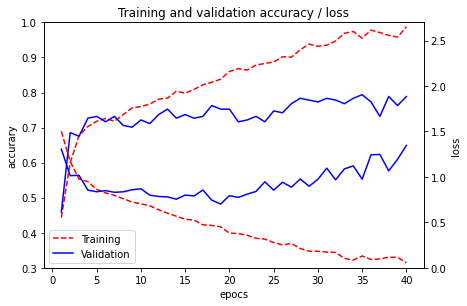

In [ ]:
#@title Doble clic para mostrar código. { display-mode: "form" }

import matplotlib.pyplot as plt

def show_accuracy(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc)+1)
  print("acc: ", acc)
  print("val_acc: ", val_acc)
  print("loss: ", loss)
  print("val_loss: ", val_loss)
  
  fig, ax1 = plt.subplots()
  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  ax1.axis(ymin=0.3, ymax=1.0)
  ax1.set_xlabel('epocs')
  ax1.set_ylabel('accurary')
  ax1.plot(epochs, acc, 'r--', label='Training accuracy')
  ax1.plot(epochs, val_acc, 'b', label='Validation accuracy')
  ax2 = ax1.twinx() 
  ax2.set_ylabel('loss')
  ax2.axis(ymin=0.0, ymax=2.7)
  ax2.plot(epochs, loss, 'r--', label='Training')
  ax2.plot(epochs, val_loss, 'b', label='Validation')
  plt.title('Training and validation accuracy / loss')
  plt.legend(loc="lower left")#"best")#0
  plt.show()

show_accuracy(H)

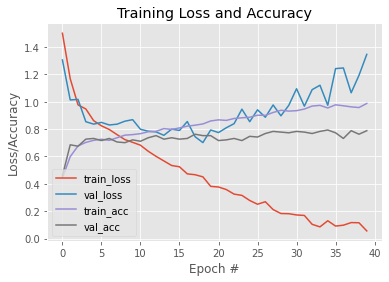

In [ ]:
#@title Doble clic para mostrar código. { display-mode: "form" }
import matplotlib.pyplot as plt
import numpy as np

#predIdxs = model.predict(testX, batch_size=BS)
#predIdxs = np.argmax(predIdxs, axis=1)
#print(classification_report(testY.argmax(axis=1), predIdxs,
#	target_names=lb.classes_))

N = len(H.history["loss"])
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

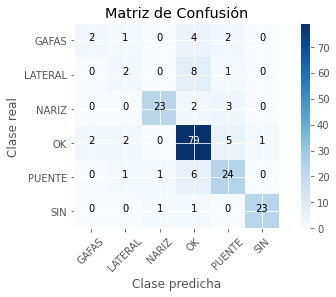

In [ ]:
#@title Doble clic para mostrar código. { display-mode: "form" }

from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes_map,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    """
    Esta función visualiza la matriz de confusión.
    Usa el parámetro `normalize=True` para normalizar los resultados.
    Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes_map))
    inv_map = {v: k for k, v in classes_map.items()}
    labels = inv_map.values()
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    if normalize:
        cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Clase real')
    plt.xlabel('Clase predicha')

"""
Obtener la matriz de confusión de un corpus creado desde un ImageDataGenerator 
es algo más complejo que el último ejemplo estudiado. El problema está en que las 
muestras son extraidas por lotes (bath) y la función 
confusion_matrix(validation_classes, y_pred) espera que sus dos parámetros sean 
vectores. Para resolverlo recorremos todos los lotes el generador y vamos 
concatenando los vectores adecuados.
Otra solución alternativa en:
https://stackoverflow.com/questions/47907061/how-to-get-confusion-matrix-when-using-model-fit-generator
"""
validation_classes = []
validation_images = []
for i in range( -(-validation_generator.samples // validation_generator.batch_size)):  # número de veces que podemos sacar batch redondeado hacia arriba
   batch = validation_generator.next()
   expected = np.argmax(batch[1], axis=1) 
   validation_classes.extend(expected)
   validation_images.extend(batch[0])
validation_classes = np.array(validation_classes)
validation_images = np.array(validation_images)
Y_pred = model.predict(validation_images)
y_pred = np.argmax(Y_pred, axis=1)
my_confussion = confusion_matrix(validation_classes, y_pred)
plot_confusion_matrix(my_confussion, classes_map = validation_generator.class_indices)#, normalize=True)

              precision    recall  f1-score   support

     GLASSES       0.50      0.22      0.31         9
    FIT SIDE       0.33      0.18      0.24        11
    NOSE OUT       0.92      0.82      0.87        28
     CORRECT       0.79      0.89      0.84        89
    N.BRIDGE       0.69      0.75      0.72        32
     NO MASK       0.96      0.92      0.94        25

    accuracy                           0.79       194
   macro avg       0.70      0.63      0.65       194
weighted avg       0.77      0.79      0.78       194



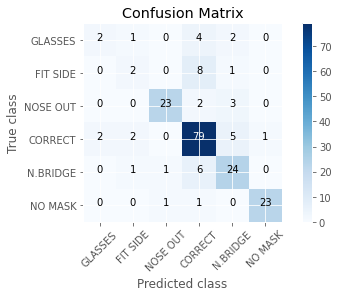

In [ ]:
#@title Doble clic para mostrar código. { display-mode: "form" }

from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes_map,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función visualiza la matriz de confusión.
    Usa el parámetro `normalize=True` para normalizar los resultados.
    Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes_map))
    inv_map = {v: k for k, v in classes_map.items()}
    labels = inv_map.values()
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    if normalize:
        cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True class')
    plt.xlabel('Predicted class')

"""
Obtener la matriz de confusión de un corpus creado desde un ImageDataGenerator 
es algo más complejo que el último ejemplo estudiado. El problema está en que las 
muestras son extraidas por lotes (bath) y la función 
confusion_matrix(validation_classes, y_pred) espera que sus dos parámetros sean 
vectores. Para resolverlo recorremos todos los lotes el generador y vamos 
concatenando los vectores adecuados.
Otra solución alternativa en:
https://stackoverflow.com/questions/47907061/how-to-get-confusion-matrix-when-using-model-fit-generator
"""
validation_classes = []
validation_images = []
for i in range( -(-validation_generator.samples // validation_generator.batch_size)):  # número de veces que podemos sacar batch redondeado hacia arriba
   batch = validation_generator.next()
   expected = np.argmax(batch[1], axis=1) 
   validation_classes.extend(expected)
   validation_images.extend(batch[0])
validation_classes = np.array(validation_classes)
validation_images = np.array(validation_images)
Y_pred = model.predict(validation_images)
y_pred = np.argmax(Y_pred, axis=1)


print(classification_report(validation_classes, y_pred, 
		target_names = ['GLASSES', 'FIT SIDE', 'NOSE OUT', 'CORRECT', 'N.BRIDGE', 'NO MASK']))

my_confussion = confusion_matrix(validation_classes, y_pred)
classes = {'GLASSES': 0, 'FIT SIDE': 1, 'NOSE OUT': 2, 'CORRECT': 3, 'N.BRIDGE': 4, 'NO MASK': 5}
plot_confusion_matrix(my_confussion, classes_map = classes)#validation_generator.class_indices)#, normalize=True)